In [1]:
machine = 'mac'
machine = 'magny'

In [2]:
from galpy.potential import NFWPotential as NFWpot
from galpy.potential import HernquistPotential as HEpot
from galpy.potential import DoubleExponentialDiskPotential as DEpot
from galpy.potential import MiyamotoNagaiPotential as MNpot
from galpy.potential import MN3ExponentialDiskPotential as MN3pot
from galpy.potential import MWPotential2014

from galpy.potential import evaluateDensities, evaluatePotentials
from galpy.potential import plotDensities
from galpy.potential import plotRotcurve
from galpy.util import bovy_conversion

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *

%matplotlib inline

In [ ]:
### finde nen Weg um das ganze von klein r abhängig zu machen 
### finde sinnvolle Standartwerte für Initialisierungs Parameter
### eventuell nur dens ODER pot ausgeben, hängt von Fit funktion ab 
### ravel works in the way I want?

def galpy_fitting(r, R, z, r0, v0, a_mp = 0.5, b_mp = 0.0375, n_mp = 0.6, a_nfw = 4.5, n_nfw = 0.35, \
                  a_he = 0.6 / 8., n_he = 0.05, hr_de = 0.3333333333333333, hz_de = 0.0625, \
                  dens_fit = True, pot_fit = False):
    
    mp = MNpot(a = a_mp, b = b_mp, normalize = n_mp, r0 = r0, v0 = v0)
    nfwp = NFWpot(a = a_nfw, normalize = n_nfw, r0 = r0, v0 = v0)
    hep = HEpot(a = a_he, normalize = n_he, r0 = r0, v0 = v0)
    de = DEpot(hr = hr_de, hz = hz_de, normalize = 1. - (n_mp + n_nfw + n_he), r0 = r0, v0 = v0)
    
    pot = [mp, nfwp, hep, de]
    dens = np.zeros([len(R), len(z)])
    pot_mod = np.zeros([len(R), len(z)])
    if dens_fit == True:
        for ii, Rii in enumerate(R):
            for jj, zjj in enumerate(z):
                dens[ii, jj] = evaluateDensities(pot, Rii, zjj)
    if pot_fit == True:
        for ii, Rii in enumerate(R):
            for jj, zjj in enumerate(z):
                pot_mod[ii, jj] = evaluatePotentials(pot, Rii, zjj)
            
    dens = np.ravel(dens)
    pot_mod = np.ravel(pot_mod)
    return dens, pot_mod 

In [3]:
Ngalrad = 4.
dR_kpc = 0.5
dz_kpc = 0.5

In [4]:
cmap = copy.copy(plt.cm.inferno)
cmap.set_bad((0,0,0))  # Fill background with black

In [5]:
#### path = /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/*
level = 4
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in range(127,128,1):
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True) 

        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
     

level   : 4
halo    : 24
snapnr  : 127
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 34.42281723  33.16259384  37.29567337]
Found 1783163 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)



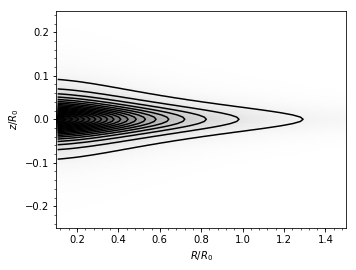

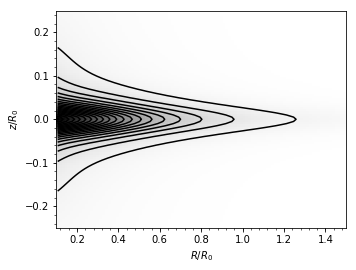

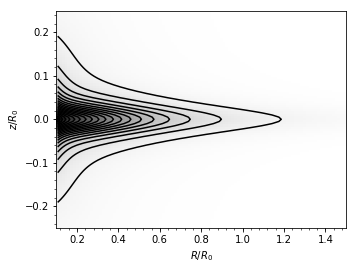

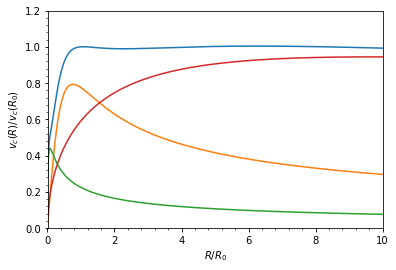

In [15]:
mp= MNpot(a=0.5,b=0.0375,normalize=.6)
nfwp= NFWpot(a=4.5,normalize=.35)
hp= HQpot(a=0.6/8,normalize=0.05)



plotDensities([mp],rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101)
plotDensities([mp, nfwp],rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101)

plotDensities([mp, nfwp, hp],rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101)


plotRotcurve([hp,mp,nfwp],Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2])
mp.plotRotcurve(Rrange=[0.01,10.],grid=1001,overplot=True)
hp.plotRotcurve(Rrange=[0.01,10.],grid=1001,overplot=True)
nfwp.plotRotcurve(Rrange=[0.01,10.],grid=1001,overplot=True)

In [ ]:
mp.dens(1.,0.)